In [ ]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('/content/knn .csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values
print(x)
print(y)



[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1]


In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
print(x_test)

[[ 1.41900117 -1.07104829]
 [-0.52413557  0.70700683]
 [-1.3422984   0.76831908]
 [ 0.08948656 -1.19367278]
 [ 0.39629762 -1.13236054]
 [ 1.62354187 -0.24333298]]


In [ ]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)
print(classifier)

KNeighborsClassifier()


In [ ]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
print(y_pred)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[1 0 0 0 1 1]
[[3 1]
 [0 2]]


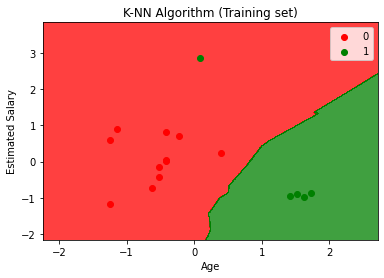

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()


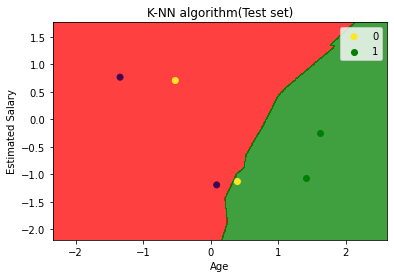

In [ ]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN algorithm(Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()
